## Task 2

## Prediction using unsupervised learning

## Predicting the optimum number of clusters and representing it visually

## Author : Sana V H

### Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Checking the current directory

In [13]:
pwd

'C:\\Users\\Sana\\Desktop\\spark\\pro 2'

### Importing dataset 

In [17]:
iris = pd.read_csv('C:\\Users\\Sana\\Desktop\\spark\\pro 2/Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Finding optimum number of clusters

In [21]:
x = iris.iloc[:, [1,2,3,4]].values

### Finding the optimal number of clusters using the elbow method

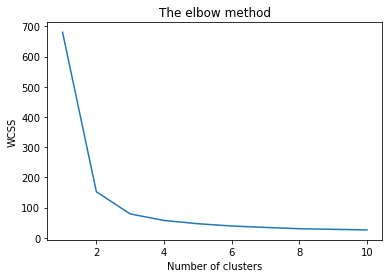

In [23]:
from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

The method is termed as 'Elbow Method' because from the graph it clearly depicts that the optimal number of clusters is where the elbow occurs. At this point, WCSS decreases significantly with each iteration.

### Training the K-means Model on the dataset

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the obtained clusters

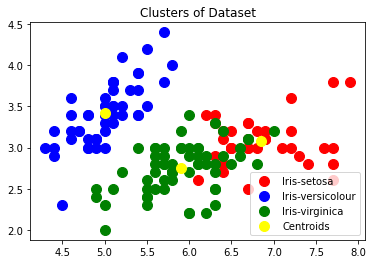

In [26]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.title("Clusters of Dataset")
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()